In [10]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

Stock name: LVS
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


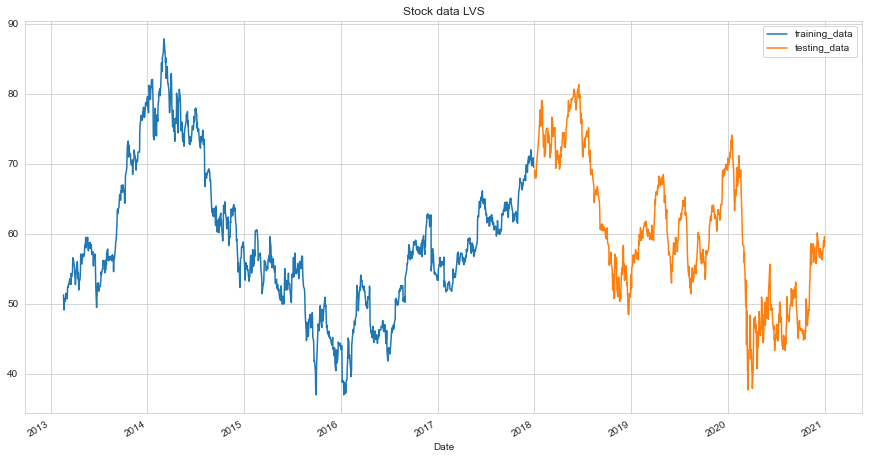

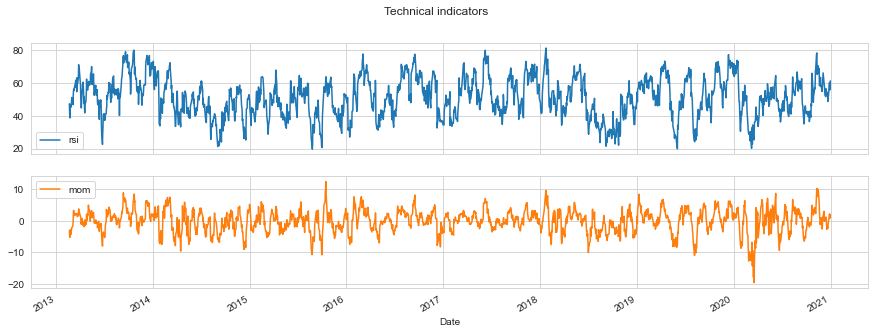

In [11]:
stock_name = 'lvs'.upper()
industry = 'Consumer cyclical'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1302.65, duration: 0:00:00.359086
episode: 2/2000, episode end value: 1283.27, duration: 0:00:00.375085
episode: 3/2000, episode end value: 1290.13, duration: 0:00:00.397090
episode: 4/2000, episode end value: 1272.54, duration: 0:00:00.339073
episode: 5/2000, episode end value: 1286.91, duration: 0:00:00.341076
episode: 6/2000, episode end value: 1282.70, duration: 0:00:00.325075
episode: 7/2000, episode end value: 1290.84, duration: 0:00:00.276057
episode: 8/2000, episode end value: 1302.77, duration: 0:00:00.310070
episode: 9/2000, episode end value: 1324.21, duration: 0:00:00.278065
episode: 10/2000, episode end value: 1338.47, duration: 0:00:00.282062
episode: 11/2000, episode end value: 1294.38, duration: 0:00:00.267061
episode: 12/2000, episode end value: 1291.52, duration: 0:00:00.254059
episode: 13/2000, episode end value: 1287.39, duration: 0:00:00.300067
episode: 14/2000, episode end value: 1227.80, duration: 0:00:00.268056
episode: 15/200

episode: 117/2000, episode end value: 1327.57, duration: 0:00:00.323073
episode: 118/2000, episode end value: 1274.09, duration: 0:00:00.341077
episode: 119/2000, episode end value: 1264.93, duration: 0:00:00.317070
episode: 120/2000, episode end value: 1298.91, duration: 0:00:00.291068
episode: 121/2000, episode end value: 1260.52, duration: 0:00:00.310067
episode: 122/2000, episode end value: 1244.49, duration: 0:00:00.300072
episode: 123/2000, episode end value: 1274.12, duration: 0:00:00.345074
episode: 124/2000, episode end value: 1248.92, duration: 0:00:00.295067
episode: 125/2000, episode end value: 1267.81, duration: 0:00:00.304065
episode: 126/2000, episode end value: 1268.71, duration: 0:00:00.342077
episode: 127/2000, episode end value: 1269.46, duration: 0:00:00.318070
episode: 128/2000, episode end value: 1263.21, duration: 0:00:00.298072
episode: 129/2000, episode end value: 1281.24, duration: 0:00:00.314067
episode: 130/2000, episode end value: 1259.06, duration: 0:00:00

episode: 231/2000, episode end value: 1290.30, duration: 0:00:00.306070
episode: 232/2000, episode end value: 1250.48, duration: 0:00:00.371082
episode: 233/2000, episode end value: 1283.32, duration: 0:00:00.410095
episode: 234/2000, episode end value: 1253.90, duration: 0:00:00.356082
episode: 235/2000, episode end value: 1273.69, duration: 0:00:00.359078
episode: 236/2000, episode end value: 1253.78, duration: 0:00:00.381083
episode: 237/2000, episode end value: 1250.83, duration: 0:00:00.406093
episode: 238/2000, episode end value: 1275.74, duration: 0:00:00.341077
episode: 239/2000, episode end value: 1264.46, duration: 0:00:00.366083
episode: 240/2000, episode end value: 1250.74, duration: 0:00:00.391086
episode: 241/2000, episode end value: 1231.11, duration: 0:00:00.387088
episode: 242/2000, episode end value: 1273.92, duration: 0:00:00.307062
episode: 243/2000, episode end value: 1239.40, duration: 0:00:00.396085
episode: 244/2000, episode end value: 1277.63, duration: 0:00:00

episode: 345/2000, episode end value: 1261.95, duration: 0:00:00.335074
episode: 346/2000, episode end value: 1241.56, duration: 0:00:00.411093
episode: 347/2000, episode end value: 1237.35, duration: 0:00:00.425096
episode: 348/2000, episode end value: 1221.81, duration: 0:00:00.365091
episode: 349/2000, episode end value: 1264.87, duration: 0:00:00.378083
episode: 350/2000, episode end value: 1248.70, duration: 0:00:00.344077
episode: 351/2000, episode end value: 1263.12, duration: 0:00:00.409091
episode: 352/2000, episode end value: 1247.43, duration: 0:00:00.324073
episode: 353/2000, episode end value: 1268.40, duration: 0:00:00.452103
episode: 354/2000, episode end value: 1277.96, duration: 0:00:00.358079
episode: 355/2000, episode end value: 1256.08, duration: 0:00:00.329072
episode: 356/2000, episode end value: 1265.09, duration: 0:00:00.379088
episode: 357/2000, episode end value: 1258.55, duration: 0:00:00.325075
episode: 358/2000, episode end value: 1295.79, duration: 0:00:00

episode: 459/2000, episode end value: 1201.61, duration: 0:00:00.385082
episode: 460/2000, episode end value: 1248.08, duration: 0:00:00.331074
episode: 461/2000, episode end value: 1209.60, duration: 0:00:00.450107
episode: 462/2000, episode end value: 1224.56, duration: 0:00:00.471110
episode: 463/2000, episode end value: 1223.71, duration: 0:00:00.358081
episode: 464/2000, episode end value: 1239.35, duration: 0:00:00.431097
episode: 465/2000, episode end value: 1244.86, duration: 0:00:00.382086
episode: 466/2000, episode end value: 1294.89, duration: 0:00:00.359081
episode: 467/2000, episode end value: 1296.97, duration: 0:00:00.371084
episode: 468/2000, episode end value: 1288.97, duration: 0:00:00.364082
episode: 469/2000, episode end value: 1246.53, duration: 0:00:00.416094
episode: 470/2000, episode end value: 1267.87, duration: 0:00:00.392088
episode: 471/2000, episode end value: 1281.46, duration: 0:00:00.363082
episode: 472/2000, episode end value: 1247.60, duration: 0:00:00

episode: 573/2000, episode end value: 1279.35, duration: 0:00:00.339071
episode: 574/2000, episode end value: 1265.50, duration: 0:00:00.431101
episode: 575/2000, episode end value: 1255.61, duration: 0:00:00.354077
episode: 576/2000, episode end value: 1285.09, duration: 0:00:00.399089
episode: 577/2000, episode end value: 1242.06, duration: 0:00:00.381087
episode: 578/2000, episode end value: 1307.00, duration: 0:00:00.335073
episode: 579/2000, episode end value: 1257.13, duration: 0:00:00.397092
episode: 580/2000, episode end value: 1235.04, duration: 0:00:00.358079
episode: 581/2000, episode end value: 1244.90, duration: 0:00:00.366089
episode: 582/2000, episode end value: 1283.96, duration: 0:00:00.449096
episode: 583/2000, episode end value: 1252.69, duration: 0:00:00.392087
episode: 584/2000, episode end value: 1253.18, duration: 0:00:00.364084
episode: 585/2000, episode end value: 1267.95, duration: 0:00:00.345081
episode: 586/2000, episode end value: 1281.31, duration: 0:00:00

episode: 687/2000, episode end value: 1267.98, duration: 0:00:00.354085
episode: 688/2000, episode end value: 1245.59, duration: 0:00:00.385084
episode: 689/2000, episode end value: 1248.44, duration: 0:00:00.398095
episode: 690/2000, episode end value: 1343.52, duration: 0:00:00.343076
episode: 691/2000, episode end value: 1277.40, duration: 0:00:00.370081
episode: 692/2000, episode end value: 1329.26, duration: 0:00:00.326073
episode: 693/2000, episode end value: 1341.60, duration: 0:00:00.343079
episode: 694/2000, episode end value: 1235.75, duration: 0:00:00.418091
episode: 695/2000, episode end value: 1256.13, duration: 0:00:00.427099
episode: 696/2000, episode end value: 1276.17, duration: 0:00:00.410094
episode: 697/2000, episode end value: 1293.11, duration: 0:00:00.361080
episode: 698/2000, episode end value: 1252.66, duration: 0:00:00.418091
episode: 699/2000, episode end value: 1265.53, duration: 0:00:00.397089
episode: 700/2000, episode end value: 1295.12, duration: 0:00:00

episode: 801/2000, episode end value: 1301.43, duration: 0:00:00.357077
episode: 802/2000, episode end value: 1277.59, duration: 0:00:00.333077
episode: 803/2000, episode end value: 1337.67, duration: 0:00:00.378085
episode: 804/2000, episode end value: 1290.21, duration: 0:00:00.405091
episode: 805/2000, episode end value: 1254.46, duration: 0:00:00.312071
episode: 806/2000, episode end value: 1284.47, duration: 0:00:00.382088
episode: 807/2000, episode end value: 1250.29, duration: 0:00:00.394087
episode: 808/2000, episode end value: 1262.49, duration: 0:00:00.397089
episode: 809/2000, episode end value: 1254.65, duration: 0:00:00.339076
episode: 810/2000, episode end value: 1249.29, duration: 0:00:00.362083
episode: 811/2000, episode end value: 1257.96, duration: 0:00:00.320072
episode: 812/2000, episode end value: 1249.04, duration: 0:00:00.382085
episode: 813/2000, episode end value: 1240.19, duration: 0:00:00.408090
episode: 814/2000, episode end value: 1260.61, duration: 0:00:00

episode: 915/2000, episode end value: 1256.76, duration: 0:00:00.321071
episode: 916/2000, episode end value: 1238.02, duration: 0:00:00.416094
episode: 917/2000, episode end value: 1260.11, duration: 0:00:00.353076
episode: 918/2000, episode end value: 1278.85, duration: 0:00:00.356081
episode: 919/2000, episode end value: 1271.54, duration: 0:00:00.341077
episode: 920/2000, episode end value: 1251.65, duration: 0:00:00.385085
episode: 921/2000, episode end value: 1267.84, duration: 0:00:00.388089
episode: 922/2000, episode end value: 1278.08, duration: 0:00:00.384094
episode: 923/2000, episode end value: 1242.92, duration: 0:00:00.343071
episode: 924/2000, episode end value: 1294.94, duration: 0:00:00.297067
episode: 925/2000, episode end value: 1287.32, duration: 0:00:00.338077
episode: 926/2000, episode end value: 1255.23, duration: 0:00:00.391089
episode: 927/2000, episode end value: 1246.00, duration: 0:00:00.379088
episode: 928/2000, episode end value: 1251.04, duration: 0:00:00

episode: 1029/2000, episode end value: 1254.26, duration: 0:00:00.320073
episode: 1030/2000, episode end value: 1342.45, duration: 0:00:00.337075
episode: 1031/2000, episode end value: 1255.43, duration: 0:00:00.368084
episode: 1032/2000, episode end value: 1246.56, duration: 0:00:00.359084
episode: 1033/2000, episode end value: 1261.22, duration: 0:00:00.370084
episode: 1034/2000, episode end value: 1263.90, duration: 0:00:00.392087
episode: 1035/2000, episode end value: 1281.67, duration: 0:00:00.344077
episode: 1036/2000, episode end value: 1250.55, duration: 0:00:00.393090
episode: 1037/2000, episode end value: 1317.51, duration: 0:00:00.316070
episode: 1038/2000, episode end value: 1247.54, duration: 0:00:00.377084
episode: 1039/2000, episode end value: 1256.06, duration: 0:00:00.433097
episode: 1040/2000, episode end value: 1263.51, duration: 0:00:00.367082
episode: 1041/2000, episode end value: 1260.00, duration: 0:00:00.386086
episode: 1042/2000, episode end value: 1272.01, dur

episode: 1142/2000, episode end value: 1304.87, duration: 0:00:00.392089
episode: 1143/2000, episode end value: 1251.37, duration: 0:00:00.445100
episode: 1144/2000, episode end value: 1248.36, duration: 0:00:00.419095
episode: 1145/2000, episode end value: 1257.75, duration: 0:00:00.368085
episode: 1146/2000, episode end value: 1249.41, duration: 0:00:00.335075
episode: 1147/2000, episode end value: 1249.28, duration: 0:00:00.389086
episode: 1148/2000, episode end value: 1285.07, duration: 0:00:00.358080
episode: 1149/2000, episode end value: 1256.28, duration: 0:00:00.370082
episode: 1150/2000, episode end value: 1248.23, duration: 0:00:00.358081
episode: 1151/2000, episode end value: 1260.04, duration: 0:00:00.371086
episode: 1152/2000, episode end value: 1268.36, duration: 0:00:00.350075
episode: 1153/2000, episode end value: 1281.97, duration: 0:00:00.355079
episode: 1154/2000, episode end value: 1244.76, duration: 0:00:00.336075
episode: 1155/2000, episode end value: 1247.51, dur

episode: 1255/2000, episode end value: 1234.59, duration: 0:00:00.381085
episode: 1256/2000, episode end value: 1230.85, duration: 0:00:00.370085
episode: 1257/2000, episode end value: 1241.15, duration: 0:00:00.328073
episode: 1258/2000, episode end value: 1277.97, duration: 0:00:00.353080
episode: 1259/2000, episode end value: 1275.48, duration: 0:00:00.343077
episode: 1260/2000, episode end value: 1312.22, duration: 0:00:00.383086
episode: 1261/2000, episode end value: 1358.78, duration: 0:00:00.370087
episode: 1262/2000, episode end value: 1260.44, duration: 0:00:00.356081
episode: 1263/2000, episode end value: 1272.11, duration: 0:00:00.388084
episode: 1264/2000, episode end value: 1271.43, duration: 0:00:00.371082
episode: 1265/2000, episode end value: 1238.88, duration: 0:00:00.397090
episode: 1266/2000, episode end value: 1255.50, duration: 0:00:00.396090
episode: 1267/2000, episode end value: 1256.05, duration: 0:00:00.414093
episode: 1268/2000, episode end value: 1306.51, dur

episode: 1368/2000, episode end value: 1271.46, duration: 0:00:00.348081
episode: 1369/2000, episode end value: 1253.73, duration: 0:00:00.369081
episode: 1370/2000, episode end value: 1300.38, duration: 0:00:00.322071
episode: 1371/2000, episode end value: 1256.42, duration: 0:00:00.346078
episode: 1372/2000, episode end value: 1254.83, duration: 0:00:00.346083
episode: 1373/2000, episode end value: 1257.89, duration: 0:00:00.333072
episode: 1374/2000, episode end value: 1293.63, duration: 0:00:00.335075
episode: 1375/2000, episode end value: 1254.70, duration: 0:00:00.320076
episode: 1376/2000, episode end value: 1266.17, duration: 0:00:00.373083
episode: 1377/2000, episode end value: 1239.91, duration: 0:00:00.406088
episode: 1378/2000, episode end value: 1234.44, duration: 0:00:00.385086
episode: 1379/2000, episode end value: 1291.70, duration: 0:00:00.416096
episode: 1380/2000, episode end value: 1263.49, duration: 0:00:00.339081
episode: 1381/2000, episode end value: 1243.22, dur

episode: 1481/2000, episode end value: 1293.00, duration: 0:00:00.382088
episode: 1482/2000, episode end value: 1280.53, duration: 0:00:00.364083
episode: 1483/2000, episode end value: 1257.76, duration: 0:00:00.384088
episode: 1484/2000, episode end value: 1267.23, duration: 0:00:00.327074
episode: 1485/2000, episode end value: 1242.64, duration: 0:00:00.408092
episode: 1486/2000, episode end value: 1269.85, duration: 0:00:00.371084
episode: 1487/2000, episode end value: 1272.20, duration: 0:00:00.359079
episode: 1488/2000, episode end value: 1253.36, duration: 0:00:00.394090
episode: 1489/2000, episode end value: 1278.85, duration: 0:00:00.319072
episode: 1490/2000, episode end value: 1284.38, duration: 0:00:00.311071
episode: 1491/2000, episode end value: 1270.80, duration: 0:00:00.388086
episode: 1492/2000, episode end value: 1272.75, duration: 0:00:00.364083
episode: 1493/2000, episode end value: 1269.97, duration: 0:00:00.420093
episode: 1494/2000, episode end value: 1249.93, dur

episode: 1594/2000, episode end value: 1256.27, duration: 0:00:00.373086
episode: 1595/2000, episode end value: 1257.20, duration: 0:00:00.381085
episode: 1596/2000, episode end value: 1282.58, duration: 0:00:00.343080
episode: 1597/2000, episode end value: 1249.21, duration: 0:00:00.400088
episode: 1598/2000, episode end value: 1241.88, duration: 0:00:00.439099
episode: 1599/2000, episode end value: 1284.35, duration: 0:00:00.362078
episode: 1600/2000, episode end value: 1253.74, duration: 0:00:00.377083
episode: 1601/2000, episode end value: 1250.43, duration: 0:00:00.385084
episode: 1602/2000, episode end value: 1247.49, duration: 0:00:00.374088
episode: 1603/2000, episode end value: 1351.97, duration: 0:00:00.364077
episode: 1604/2000, episode end value: 1278.83, duration: 0:00:00.319072
episode: 1605/2000, episode end value: 1329.59, duration: 0:00:00.370082
episode: 1606/2000, episode end value: 1247.99, duration: 0:00:00.323073
episode: 1607/2000, episode end value: 1338.41, dur

episode: 1707/2000, episode end value: 1246.87, duration: 0:00:00.304070
episode: 1708/2000, episode end value: 1269.01, duration: 0:00:00.312068
episode: 1709/2000, episode end value: 1258.09, duration: 0:00:00.357080
episode: 1710/2000, episode end value: 1303.86, duration: 0:00:00.331074
episode: 1711/2000, episode end value: 1263.89, duration: 0:00:00.375082
episode: 1712/2000, episode end value: 1265.18, duration: 0:00:00.357082
episode: 1713/2000, episode end value: 1267.79, duration: 0:00:00.364089
episode: 1714/2000, episode end value: 1241.13, duration: 0:00:00.311065
episode: 1715/2000, episode end value: 1264.81, duration: 0:00:00.322072
episode: 1716/2000, episode end value: 1254.87, duration: 0:00:00.364083
episode: 1717/2000, episode end value: 1308.65, duration: 0:00:00.347079
episode: 1718/2000, episode end value: 1251.04, duration: 0:00:00.348081
episode: 1719/2000, episode end value: 1321.34, duration: 0:00:00.333071
episode: 1720/2000, episode end value: 1251.24, dur

episode: 1820/2000, episode end value: 1236.51, duration: 0:00:00.298067
episode: 1821/2000, episode end value: 1262.69, duration: 0:00:00.291067
episode: 1822/2000, episode end value: 1259.41, duration: 0:00:00.372084
episode: 1823/2000, episode end value: 1266.39, duration: 0:00:00.336077
episode: 1824/2000, episode end value: 1347.42, duration: 0:00:00.302066
episode: 1825/2000, episode end value: 1276.19, duration: 0:00:00.336076
episode: 1826/2000, episode end value: 1277.74, duration: 0:00:00.322077
episode: 1827/2000, episode end value: 1272.25, duration: 0:00:00.312068
episode: 1828/2000, episode end value: 1274.02, duration: 0:00:00.302073
episode: 1829/2000, episode end value: 1265.88, duration: 0:00:00.299063
episode: 1830/2000, episode end value: 1294.55, duration: 0:00:00.353081
episode: 1831/2000, episode end value: 1248.91, duration: 0:00:00.341077
episode: 1832/2000, episode end value: 1253.32, duration: 0:00:00.358078
episode: 1833/2000, episode end value: 1256.86, dur

episode: 1933/2000, episode end value: 1267.60, duration: 0:00:00.330072
episode: 1934/2000, episode end value: 1260.67, duration: 0:00:00.314071
episode: 1935/2000, episode end value: 1260.22, duration: 0:00:00.312074
episode: 1936/2000, episode end value: 1272.30, duration: 0:00:00.359079
episode: 1937/2000, episode end value: 1270.63, duration: 0:00:00.327071
episode: 1938/2000, episode end value: 1272.49, duration: 0:00:00.307069
episode: 1939/2000, episode end value: 1262.05, duration: 0:00:00.302067
episode: 1940/2000, episode end value: 1252.35, duration: 0:00:00.380086
episode: 1941/2000, episode end value: 1243.97, duration: 0:00:00.301068
episode: 1942/2000, episode end value: 1271.60, duration: 0:00:00.316073
episode: 1943/2000, episode end value: 1291.44, duration: 0:00:00.330070
episode: 1944/2000, episode end value: 1243.10, duration: 0:00:00.329074
episode: 1945/2000, episode end value: 1259.03, duration: 0:00:00.312069
episode: 1946/2000, episode end value: 1300.16, dur

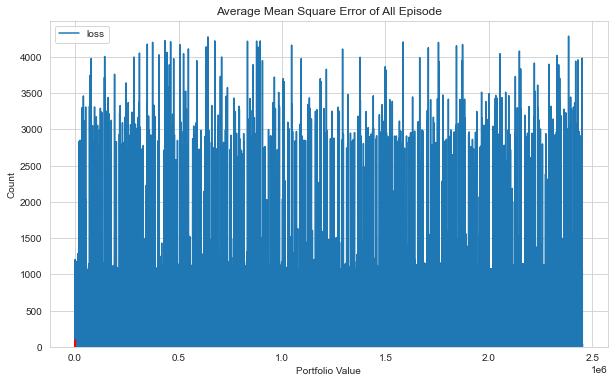

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

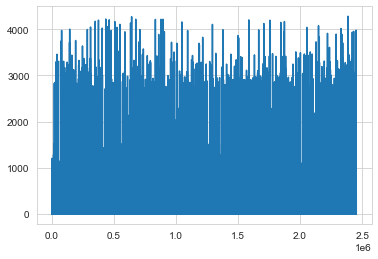

In [5]:
plt.plot(agent.model.losses)

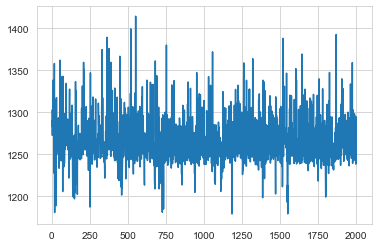

In [6]:
plt.plot(portfolio_value)

episode end value: 1086.74, duration: 0:00:00.087009
Sell: 285 times, Buy: 254 times


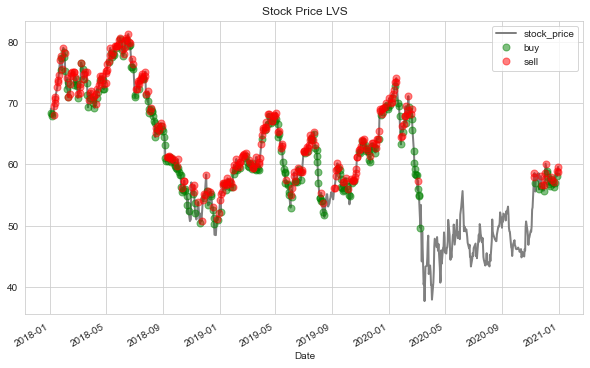

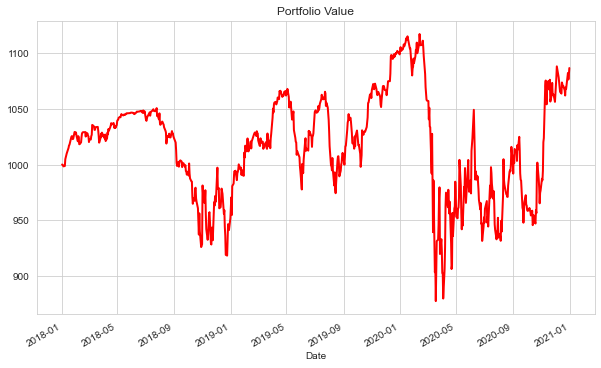

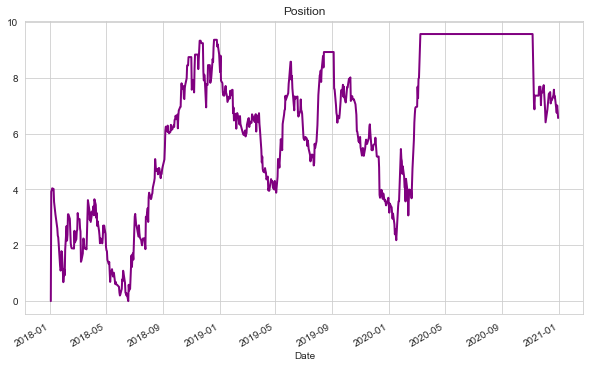

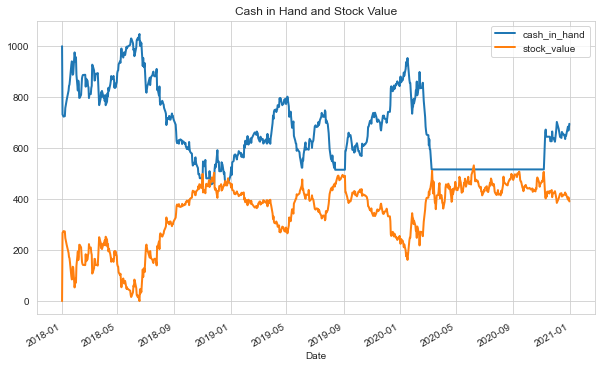

In [12]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [13]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: LVS
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 2.81 %
Volatility: 0.1788
shape ratio: 0.0957
Maximun drawdown: -21.48 %
Calmar ratio: 0.1309
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -4.81 %
Volatility (benchmark): 0.4200
shape ratio: -0.1407
Maximun drawdown: -53.64 %
Calmar ratio (benchmark): -0.0897


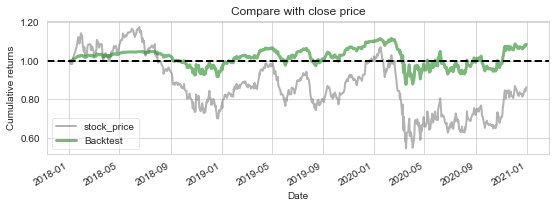

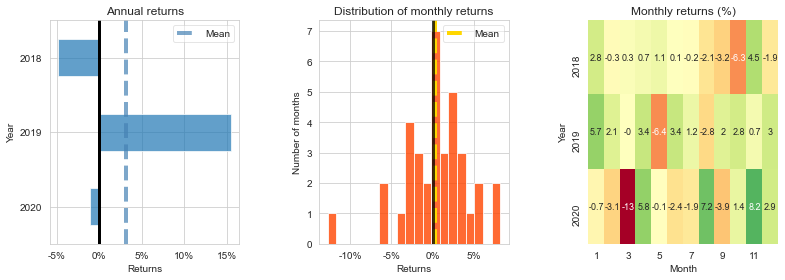

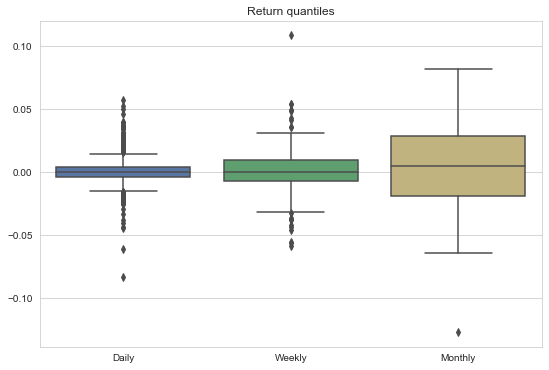

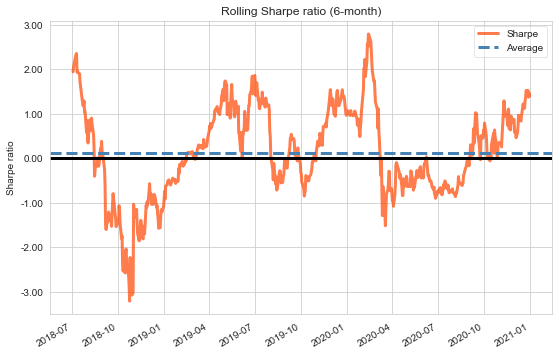

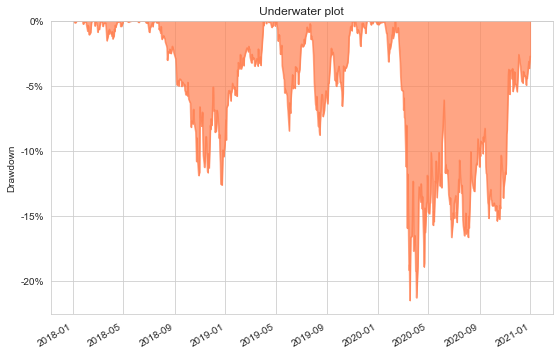

In [14]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')